<a href="https://colab.research.google.com/github/eunsour/Deep-Learning-from-Scratch/blob/main/Chapter%2005/Ch5_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4장에서 신경망의 학습에 대해서 학습하였다.
- 이때 신경망의 가중치 매개변수의 기울기 (정확히는 가중치 매개변수에 대한 손실 함수의 기울기)는 수치 미분을 사용해 구했다. 
- 수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸린다.
- 5장에서는 가중치 매개변수의 기울기를 효율적으로 계산하는 **오차역전파법(Backpropagation)**을 배워본다.

오차역전파법을 제대로 이해하는 방법은 두 가지가 있을 것이다.
1. 수식을 통한 방법 (일반적인 방법)
2. 계산 그래프를 통한 방법
</br>이번 장에서는 계산 그래프를 사용해서 '시각적'으로 이해해본다.

# 5.1 계산 그래프
**계산 그래프(Computational Graph)**는 계산 과정을 그래프로 나타낸 것이다. <br>
여기에서의 그래프는 우리가 잘 아는 그래프 자료구조로, 복수의 **노드**와 **에지**로 표현된다.

## 5.1.1 계산 그래프로 풀다.
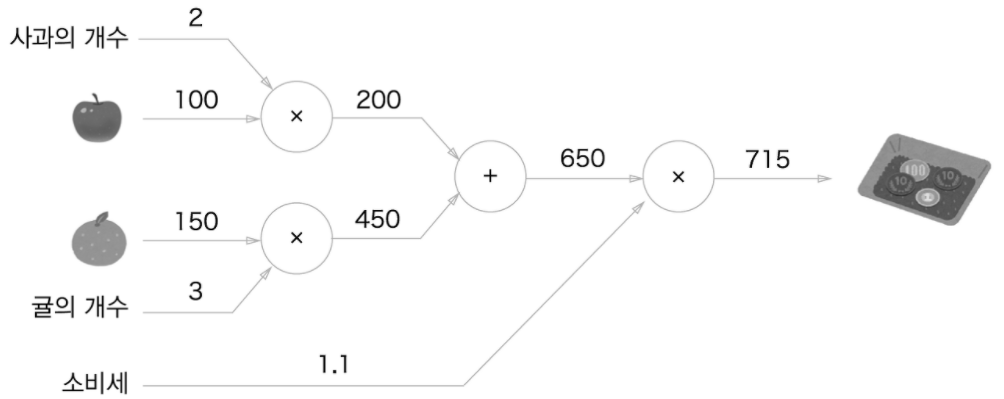
1. 계산 그래프로 구성한다.
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. (순전파)
    - 오른쪽에서 왼쪽의 전파를 **역전파**라고 한다.


## 5.1.2 국소적 계산
- 계산 그래프의 특징은 '국소적 계산'을 전파함으로써 최종 결과를 얻는다는 점에 있다.
- 국소적이란 '자신과 직접 관계된 작은 범위'라는 뜻이다.
- 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 뜻이다.
- 전체 계산이 제아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 **'국소적 계산'**이다. 

## 5.1.3 왜 계산 그래프로 푸는가?
1. 계산 그래프의 이점은 무엇일까?
    - 첫 번째는 국소적 계산이다. 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있다.
    - 또 다른 이점으로, 계산 그래프는 중간 계산 결과를 모두 보관할 수 있다. 
    - 실제 계산 그래프를 사용하는 가장 큰 이유는 역전파를 통해 **미분**을 효율적으로 계산할 수 있는 점에 있다.
2. 위의 문제 1에서 가령 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지 알아보자 
    - 이는 '사과 가격에 대한 지불 금액의 미분'을 구하는 문제에 해당한다.
    - 결과는 계산 그래프 상의 역전파에 의해서 미분을 구할 수 있다.
    -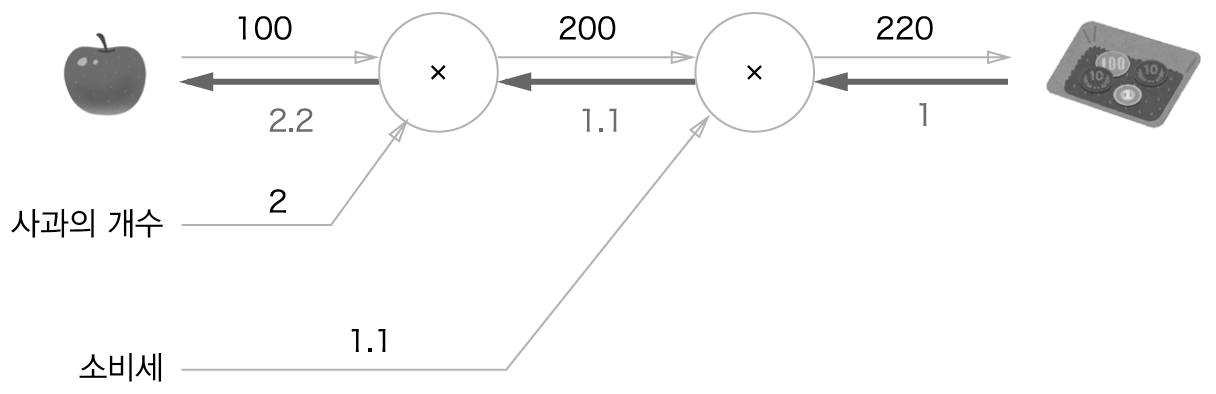
    - 이 전파는 국소적 미분을 전달하고 그 미분 값을 오른쪽에서 왼쪽으로 전달한다. 
    - 이처럼 계산 그래프의 이점은 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다는 것이다.

# 5.2 연쇄법칙
- 국소적 미분을 전달하는 원리는 **연쇄법칙(Chain Rule)**에 따른 것이다. 

## 5.2.1 계산 그래프의 역전파
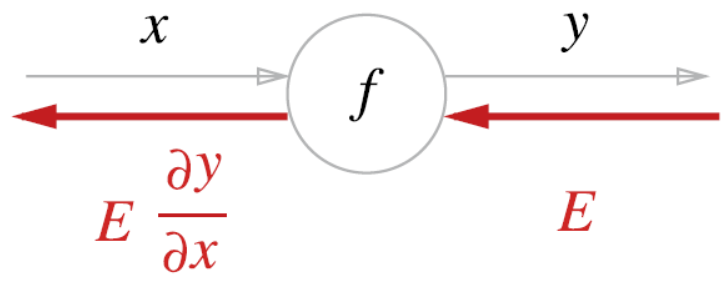
- 위 그림은 y=f(x)라는 계산의 역전파를 그림으로 그린 것이다.
- 그림과 같이 역전파의 계산 절차는 신호 E에 노드의 국소적 미분을 곱한 후 다음 노드로 전달하는 것이다. 
- 이러한 방식을 따르면 목표로 하는 미분 값을 효율적으로 구할 수 있다는 것이 이 전파의 핵심이다.

## 5.2.2 연쇄법칙이란?
연쇄법칙을 설명하려면 우선 합성 함수 이야기부터 시작해야 한다.
- **합성 함수**란 여러 함수로 구성된 함수이다. 예를 들어 z = (x+y)^2이라는 식은 두 개의 식으로 구성된다.
    - z = t^2
    - t = x + y

</br>연쇄 법칙은 합성 함수의 미분에 대한 성질이며, 다음과 같이 정의된다. 
- 함성 합수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

## 5.2.3 연쇄법칙과 계산 그래프
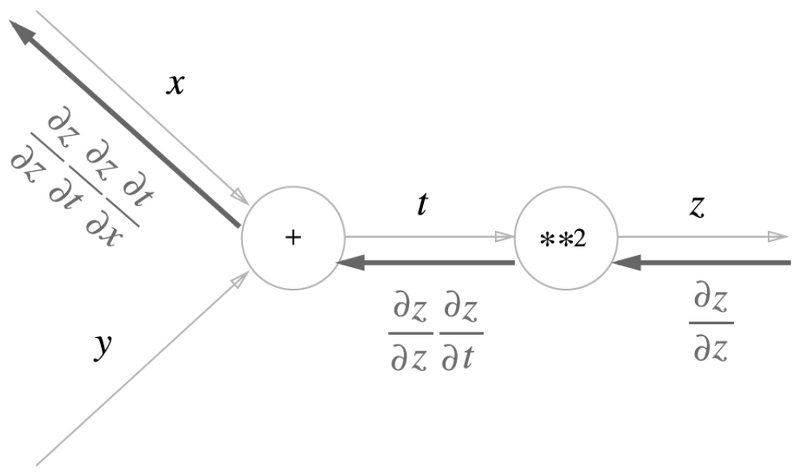
- 순전파와는 반대 방향으로 국소적 미분을 곱하여 전달한다.

# 5.3 역전파

## 5.3.1 덧셈 노드의 역전파
- z = x + y라는 식을 대상으로 역전파를 살펴본다. 
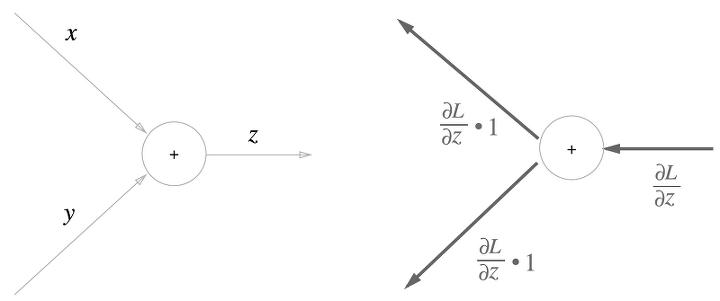
- 그림과 같이 역전파 때는 상류에서 전해진 미분에 1을 곱하여 하류로 흘린다. 즉, 덧셈 노드의 역전파는 1을 곱하기만 할 뿐이므로 입력된 값을 그대로 다음 노드로 보내게 된다. 


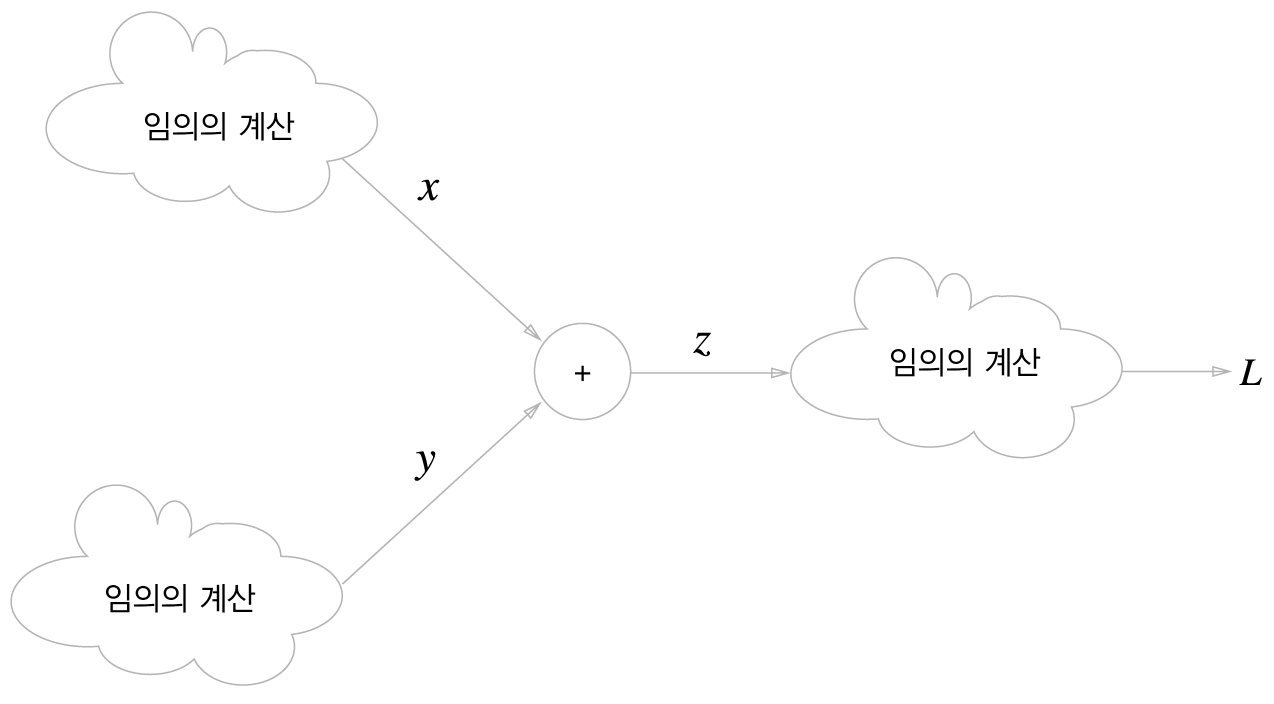
- 최종 출력으로 가는 계산의 중간에 덧셈 노드가 존대한다. 역전파에서는 국소적 미분이 가장 오른쪽의 출력에서 시작하여 노드를 타고 역방향(왼쪽)으로 전파된다.

- 가령 '10 + 5 = 15'라는 계산이 있고, 상류에서 1.3이라는 값이 흘러온다. 이를 계산 그래프로 그리면 다음과 같다.<br>
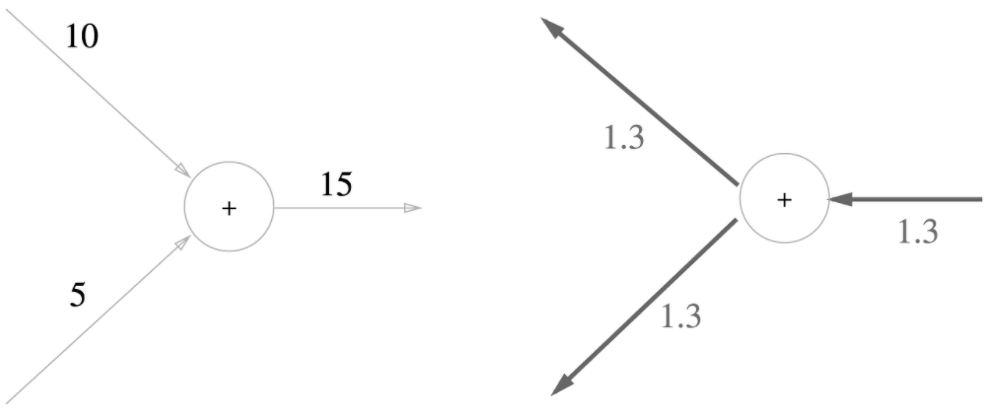
- 덧셈 노드 역전파는 입력 신호를 다음 노드로 출력할 뿐이므로 1.3을 그대로 다음 노드로 전달한다.

## 5.3.2 곱셈 노드의 역전파
- 곱셈 노드의 역전파는 z = xy라는 식을 생각해볼 때, 이 식의 미분은 다음과 같다.
- 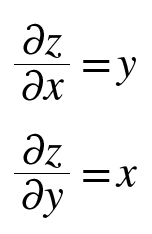

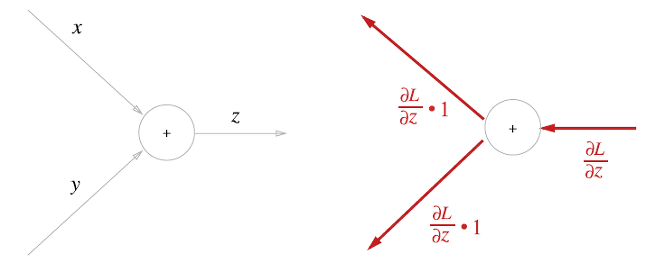
- 곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보낸다. 서로 바꾼 값이란 순전파 때 x였다면 역전파에서는 y, 순전파 때 y였다면 역전파에서는 x로 바꾼다는 의미이다.

- 가령 '10 * 5 = 50'이라는 계산이 있고, 역전파 때 상류에서 1.3값이 흘러온다고 할 때, 이를 계산 그래프로 그리면 다음 그림이 된다.
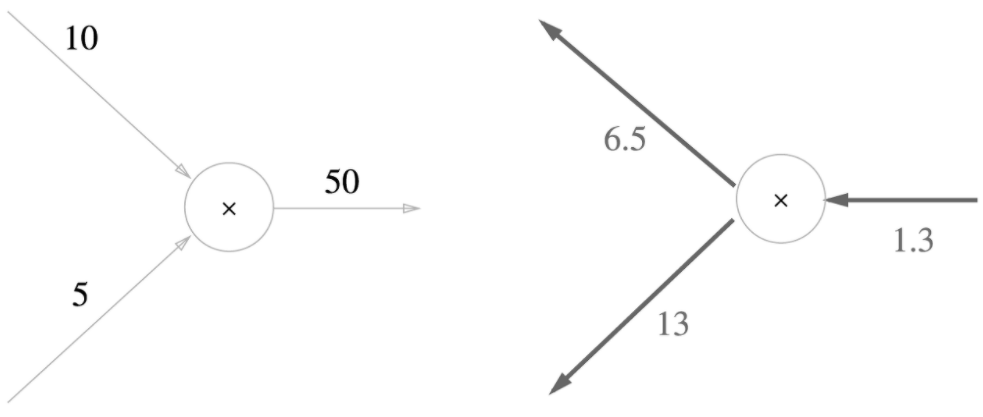
- 곱셈의 역전파에서는 입력 신호를 바꾼 값을 곱하여 하나는 1.3 * 5 = 6.5, 다른 하나는 1.3 * 10 = 13이 된다. 덧셈의 역전파에서는 상류의 값을 그대로 흘려보내서 순방향 입력 신호의 값은 필요하지 않았으나, 곱셈의 역전파는 순방향 입력 신호의 값이 필요하다. 그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 변수에 저장해둔다.

## 5.3.3 사과 쇼핑의 예
- 이 문제에서는 사과의 가격, 사과의 갯수, 소비세라는 세 변수 각각이 최종 금액에 어떻게 영향을 주느냐를 풀고자 한다. 이는 '사과 가격에 대한 지불 금액의 미분', '사과 갯수에 대한 지불 금액의 미분', '소비세에 대한 지불 금액의 미분'을 구하는 것에 해당한다. 
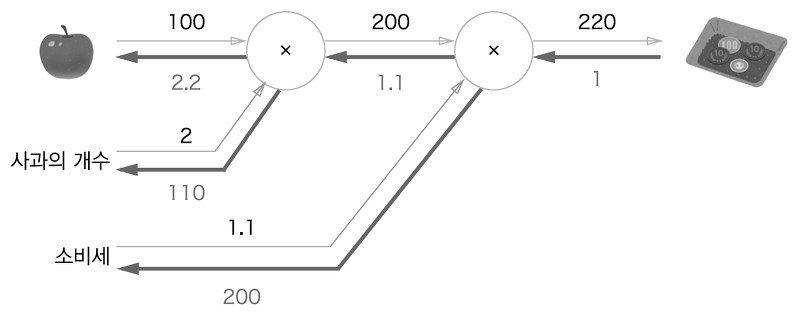
- 위의 그림의 결과를 보면 사과 가격의 미분은 2.2, 사과 갯수의 미분은 110, 소비세의 미분은 200이다. 이는 소비세와 사과 가격이 같은 양만큼 오르면 최종 금액에는 소비세가 200의 크기로, 사과 가격이 2.2의 크기로 영향을 준다고 해석할 수 있다. 단, 이 예에서 소비세와 사과 가격은 단위가 다르니 주의해야 한다.

# 5.4 단순한 계층 구현하기
- 이번 절에서는 '사과 쇼핑'예를 파이썬으로 구현한다. 

## 5.4.1 곱셈 계층
- 모든 계층은 forward()와 backward()라는 공통의 메서드(인터페이스)를 갖도록 구현할 것이다. forward()는 순전파, backward()는 역전파를 처리한다. 

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

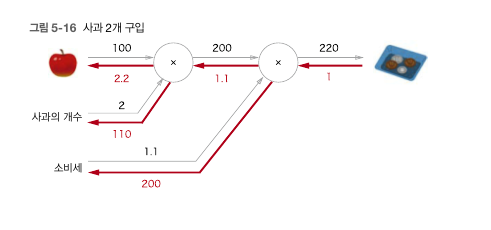

In [2]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [3]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


## 5.4.2 덧셈 계층

In [4]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

덧셈 계층에서는 초기화가 필요 없으니 __init__()에서는 아무 일도 하지 않는다.

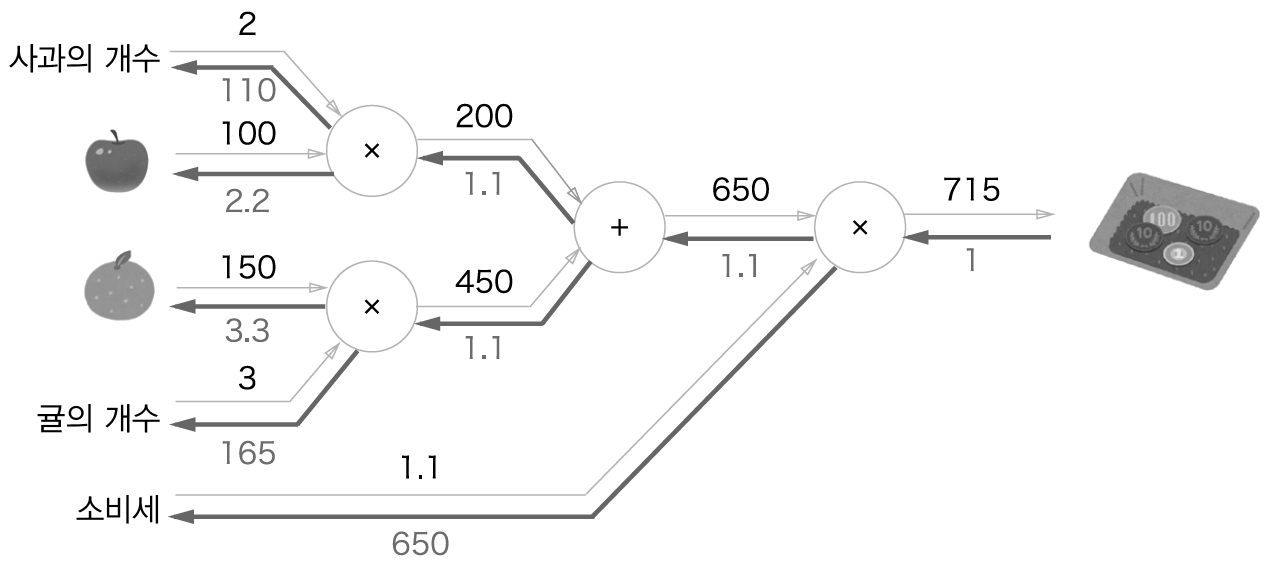

In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


# 5.5 활성화 함수 계층 구현하기


## 5.5.1 ReLU 계층
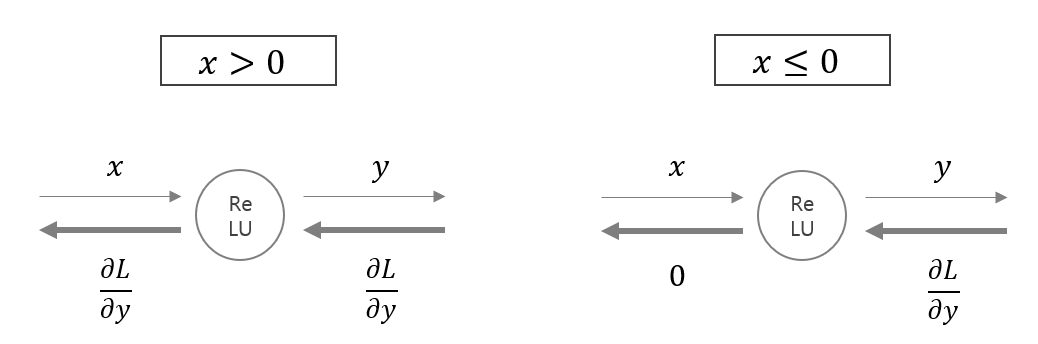
- 식에서와 같이 순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다. 반면, 순전파 때 x가 0 이하면 역전파 때는 하류로 신호를 보내지 않는다. (0을 보낸다)

In [6]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return 0

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

Relu 클래스는 mask라는 인스턴스 변수를 가진다. mask는 True, False로 구성된 넘파이 배열로, 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그 외는 False로 유지한다.

In [7]:
import numpy as np

x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [8]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


## 5.5.2 Sigmoid 계층
- 식 : $$ y = \frac{1} {1 + (exp(-x))} $$
<br><br>
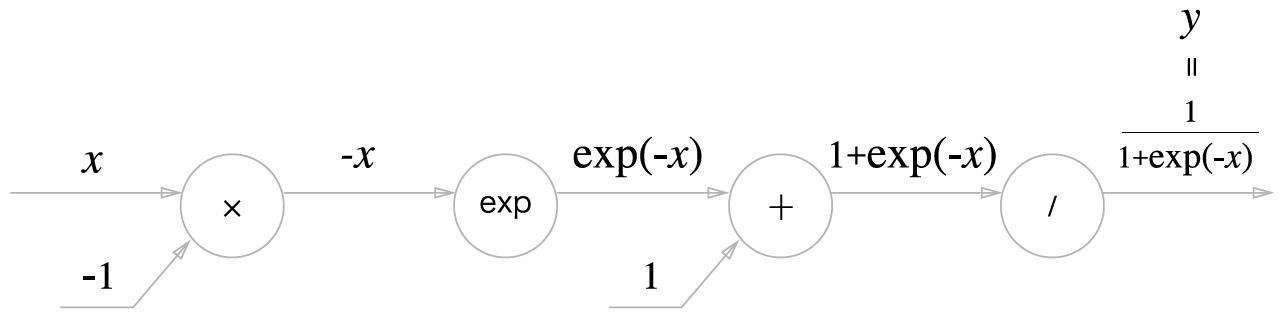

'exp' 노드는 $y = exp(x)$ 계산을 수행하고 '/' 노드는 $y = \frac{1}{x}$ 계산을 수행한다.

### 1단계
'/' 노드, 즉 $y = \frac{1}{x}$을 미분하면 다음 식이 된다.
- $\frac{∂x}{∂y} = \frac{1}{-x^2} = -y^2$
- 식에 따르면 역전파 때는 상류에서 흘러온 값에 $-y^2$(순전파의 출력을 제곱한 후 마이너스를 붙인 값)을 곱해서 하류로 전달한다. 계산 그래프에서는 다음과 같다.
- 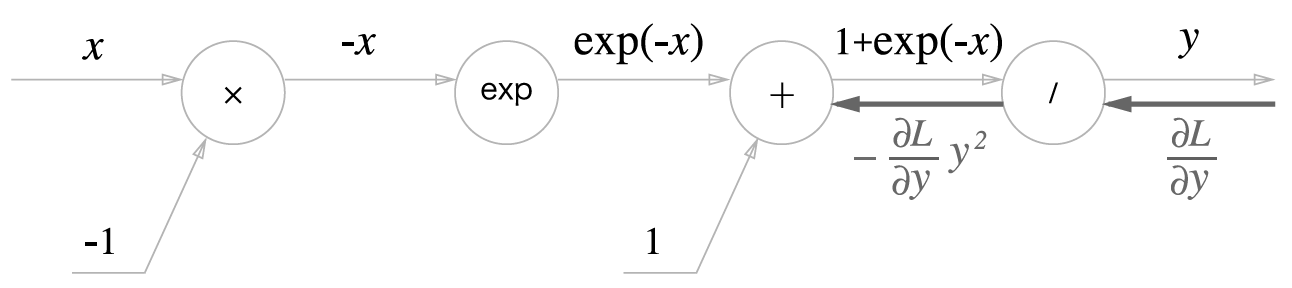


### 2단계
'+' 노드는 상류의 값을 여과없이 하류로 내보낸다. 계산 그래프에서는 다음과 같다.
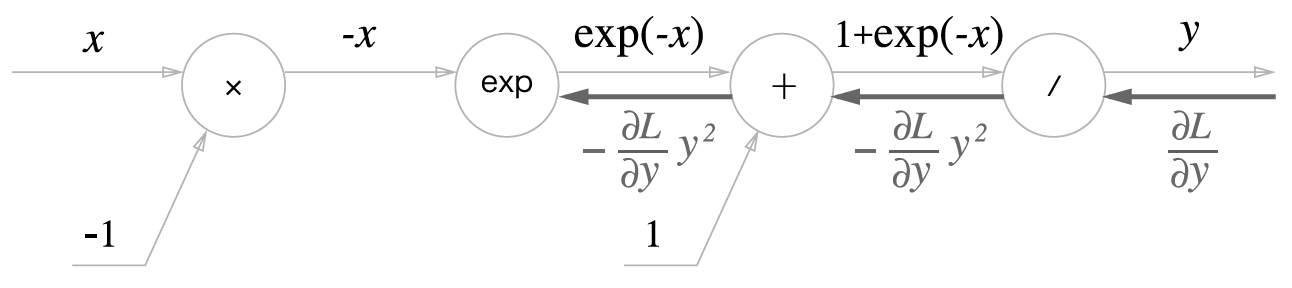

### 3단계
'exp'노드는 $y = exp(x)$ 연산을 수행하며, 그 미분은 다음과 같다. 
- $$ \frac{∂x}{∂y} = exp(x) $$  
- 계산 그래프에서는 상류의 값에 순전파 떄의 출력 (이 예에서는 $exp(-x))$을 곱해 하류로 전파한다.
- 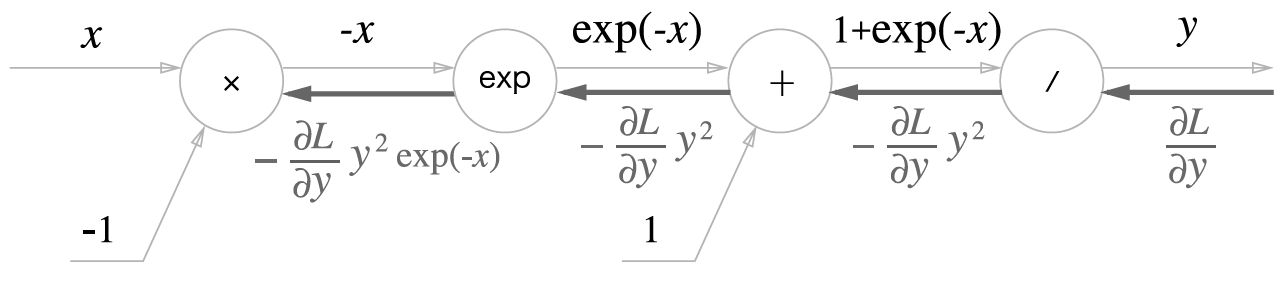


### 4단계
'x' 노드는 순전파 때의 값을 '서로 바꿔' 곱한다. 이 예에서는 -1을 곱한다.
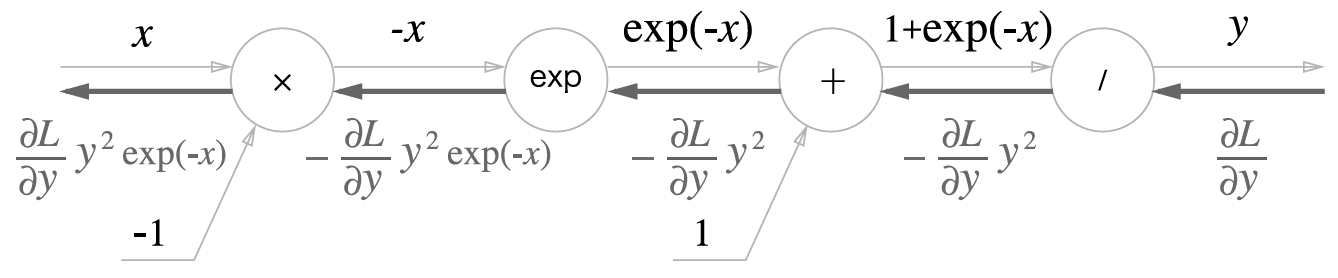

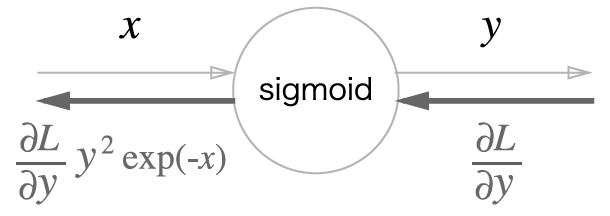  
Sigmoid 계층의 계산 그래프 : 순전파의 출력 y만으로 역전파를 계산할 수 있다.

In [9]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

# 5.6 Affine/Softmax 계층 구현하기


## 5.6.1 Affine 계층
신경망의 순전파에서는 가중치 신호의 총합을 계산하기 때문에 행렬의 곱을 사용하였다. 

In [11]:
X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B
print(Y)

(2,)
(2, 3)
(3,)
[0.99524139 0.86452524 1.01712617]


여기에서 X, W, B는 각각 형상이 (2,), (2,3), (3,)인 다차원 배열이다. 그러면 뉴런의 가중치 합은 Y = np.dot(X, W) B처럼 계산한다. 그리고 이 Y를 활성화 함수로 변환해 다음 층으로 전파하는 것이 신경망 순전파의 흐름이다. 
> 신경망의 순전파 때 수행하는 행렬의 곱은 기하학에서는 **어파인 변환**이라고 한다. 

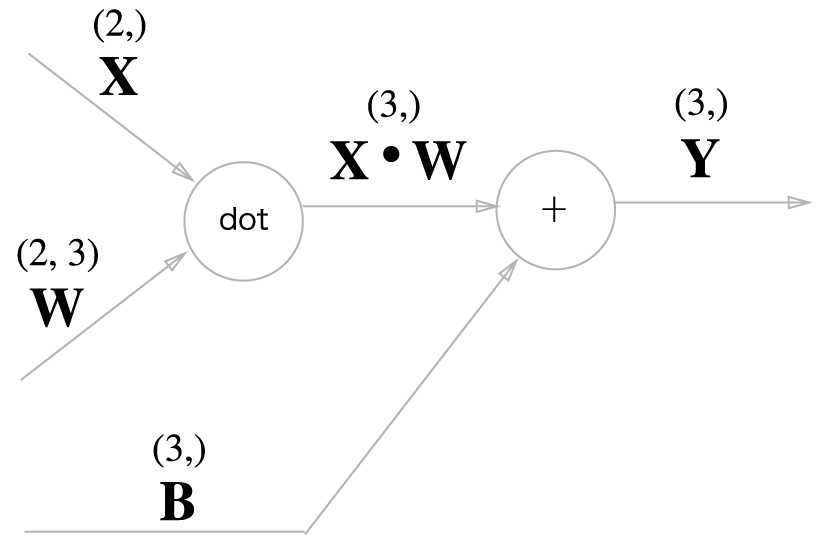  
그림은 비교적 단순한 계산 그래프이다. 단, X, W, B가 스칼라값이 아니라 **행렬**이라는 점에 주의해야 한다. 

## 5.6.2 배치용 Affine 계층
- 데이터 N개를 묶어 순전파하는 경우의 배치용 Affine 계층  
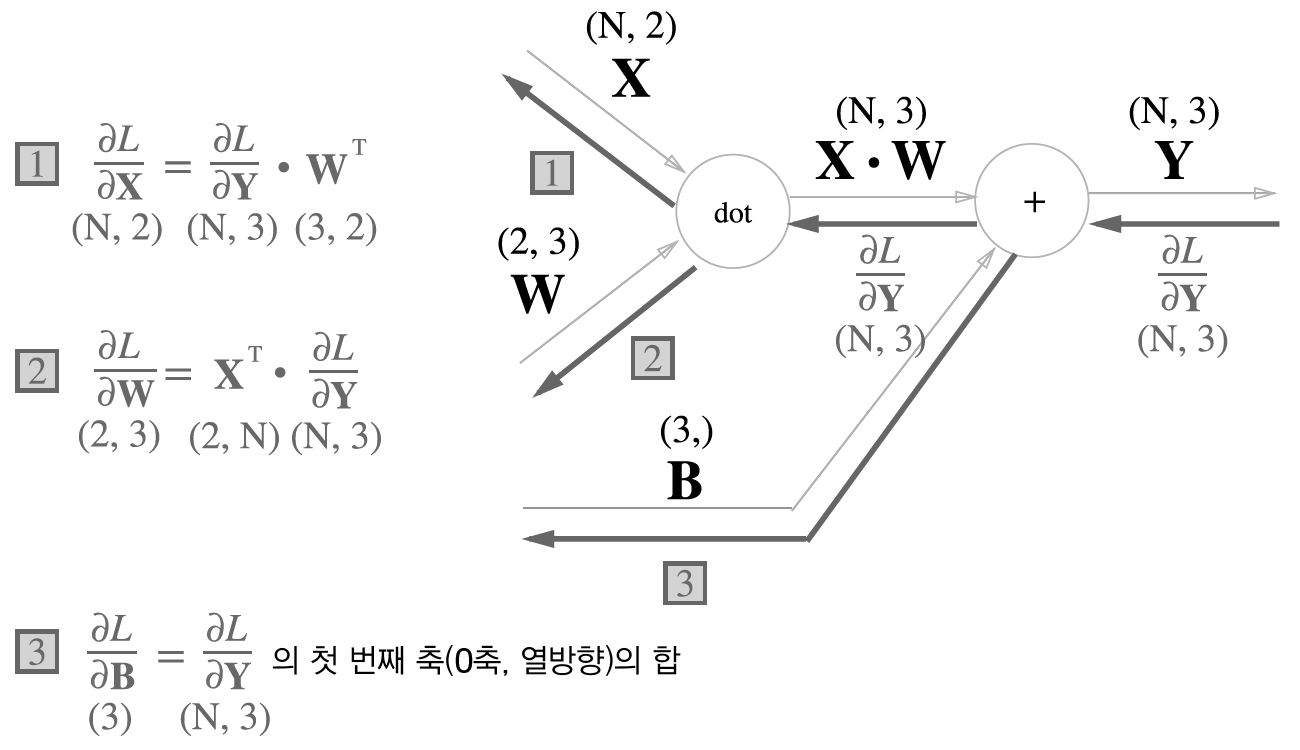

In [14]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [15]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

순전파의 편향 덧셈은 각각의 데이터에 더해진다. 그래서 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다. 코드로는 다음과 같다.

In [16]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
dB = np.sum(dY, axis = 0)
dB

array([5, 7, 9])

In [19]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)

        return dx

## 5.6.3 Softmax-with-Loss 계층
소프트맥스 함수는 입력 값을 정규화하여 출력한다.<br>
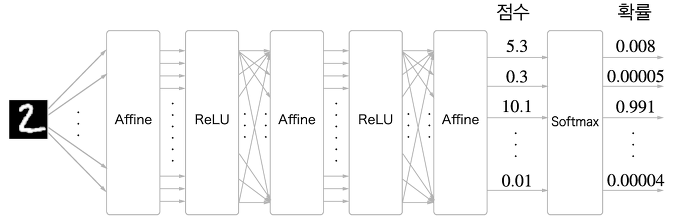<br><br>
- 입력 이미지가 Affine 게층과 ReLU 계층을 통과하며 변환되고, 마지막 Softmax 계층에 의해서 10개의 입력이 정규화된다. 이 그림에서는 숫자 0의 점수는 5.3이며, 이것이 Softmax 계층에 의해서 0.008로 변환된다. 또 2의 점수는 10.1에서 0.991로 변환된다.

> 신경망에서 수행하는 작업은 **학습**과 **추론** 두 가지이다. 추론할 때는 일반적으로 Softmax 계층을 사용하지 않는다. 예컨대 신경망은 추론할 때는 마지막 Affine 계층의 출력을 인식 결과로 이용한다. 또한, 신경망에서 정규화하지 않는 출력 결과에서는 Sofrmax 앞의 Affine 계층의 출력을 **점수**라 한다. 즉, 신경망 추론에서 답을 하나만 내는 경우에는 가장 높은 점수만 알면 되니 Softmax 계층은 필요 없다는 것이다. 반면, 신경망을 학습할 때는 Softmax 계층이 필요하다.

< 간소화한 Softmax-with-Loss 계층의 계산 그래프 ><br>
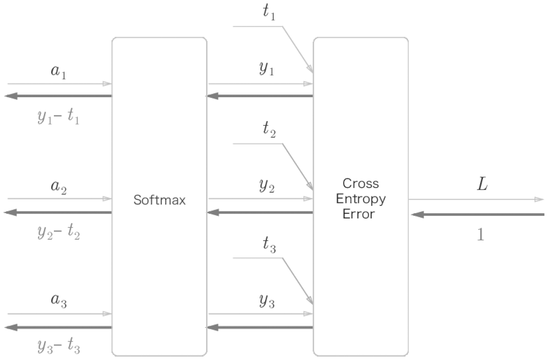

신경망 학습의 목적은 신경망의 출력(Softmax의 출력)이 정답 레이블과 가까워지도록 가중치 매개변수의 값을 조정하는 것이다. 그래서 신경망의 출력과 정답 레이블의 오차를 효율적으로 앞 계층에 전달해야 한다.

> '소프트 맥스 함수'의 손실 함수로 '교차 엔트로피 오차'를 사용하니 역전파가 말끔히 떨어진다. 사실 이런 말끔함은 우연이 아니라 교차 엔트로피 오차라는 함수가 그렇게 설계되었기 때문이다. 또, 회귀의 출력층에서 사용하는 '항등 함수'의 손실 함수로 '평균 제곱 오차'를 이용하는 이유도 이와 같다. 즉, '항등 함수'의 손실 함수로 평균 제곱 오차를 사용하면 역전파의 결과가 (y1 - t1, y2- t2, y3 - t3)로 말끔히 떨어진다.

가령 정답 레이블이 (0, 1, 0)일 때 Softmax 계층이 (0.3, 0.2, 0.5)를 출력했다고 가정해본다. 정답 레이블을 보면 정답의 인덱스는 1이다. 그런데 출력에서는 이때의 확률이 겨우 0.2(20%)라서, 이 시점의 신경망은 제대로 인식하지 못하고 있다. 이 경우 Softmax 계층의 역전파는 (0.3, -0.8, 0.5)라는 커다란 오차를 전파한다. 결과적으로 Softmax 계층의 앞 계층들은 그 큰 오차로부터 큰 깨달음을 얻게 된다. 

In [21]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None       # softmax의 출력
        self.t = None       # 정답 레이블(원-핫 벡터)

    def forward(self, x, t):
        self.t = t
        self.y = sortmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

# 5.7 오차역전파법 구현하기

## 5.7.1 신경망 학습의 전체 그림


1.   전제<br>
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 5단계로 수행한다.
2.   1단계 - 미니배치<br>
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
3.   2단계 - 기울기 산출<br>
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다. 
4.   3단계 - 매개변수 갱신 <br>
가중치 매개변수를 기울기 방향으로 아주 조금 갱|신한다.
5.   4단계 - 반복<br>
1 ~ 3단계를 반복한다.


## 5.7.2 오차역전파법을 적용한 신경망 구현하기

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
%cd common

/content/drive/My Drive/Deep-Learning-from-Scratch/common


In [40]:
!pwd

/content/drive/My Drive/Deep-Learning-from-Scratch/common


In [44]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import common
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

> 이 구현에서는 신경망의 계층을 OrderedDict에 보관하는 점이 중요하다. OrderedDict는 순서가 있는 딕셔너리 이다. '순서가 있는'이란 딕셔너리에 추가한 순서를 기억한다는 것이다. 그래서 순전파 때는 추가한 순서대로 각 계층의 forward( ) 메서드를 호출하기만 하면 처리가 완료된다. 마찬가지로 역전파 때는 계층을 반대 순서로 호출하기만 하면 된다. 

## 5.7.3 오차역전파법으로 구한 기울기 검증하기
기울기를 구하는 방법은 두 가지가 있다.
1. 수치 미분을 써서 구하는 방법
2. 해석적으로 수식을 풀어 구하는 방법  
해석적 방법은 오차역전파법을 이용하여 매개변수가 많아도 효율적으로 계산할 수 있었다. 

# 5.8 정리 
- 계산 그래프를 이용하면 계산 과정을 시각적으로 파악할 수 있다.
- 계산 그래프의 노드는 국소적 계산으로 구성된다. 국소적 계산을 조합해 전체 계산을 구성한다.
- 계산 그래프의 순전파는 통상의 계산을 수행한다. 한편, 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다.
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다.(오차역전파법)
- 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법의 구현에 잘못이 없는지 확인할 수 있다.(기울기 확인)